In [15]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER |TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


Kaggle credentials set.
Kaggle credentials successfully validated.


In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [6]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

stanford_rna_3d_folding_path = kagglehub.competition_download('stanford-rna-3d-folding')
train_labels = pd.read_csv(stanford_rna_3d_folding_path + '/train_labels.csv')
train_sequences = pd.read_csv(stanford_rna_3d_folding_path + '/train_sequences.csv')

print('Data source import complete.')


100%|██████████| 120M/120M [00:01<00:00, 66.6MB/s]

Extracting files...


Data source import complete.


count     844.000000
mean      162.434834
std       515.031957
min         3.000000
25%        22.000000
50%        39.500000
75%        86.000000
max      4298.000000
Name: sequence, dtype: float64


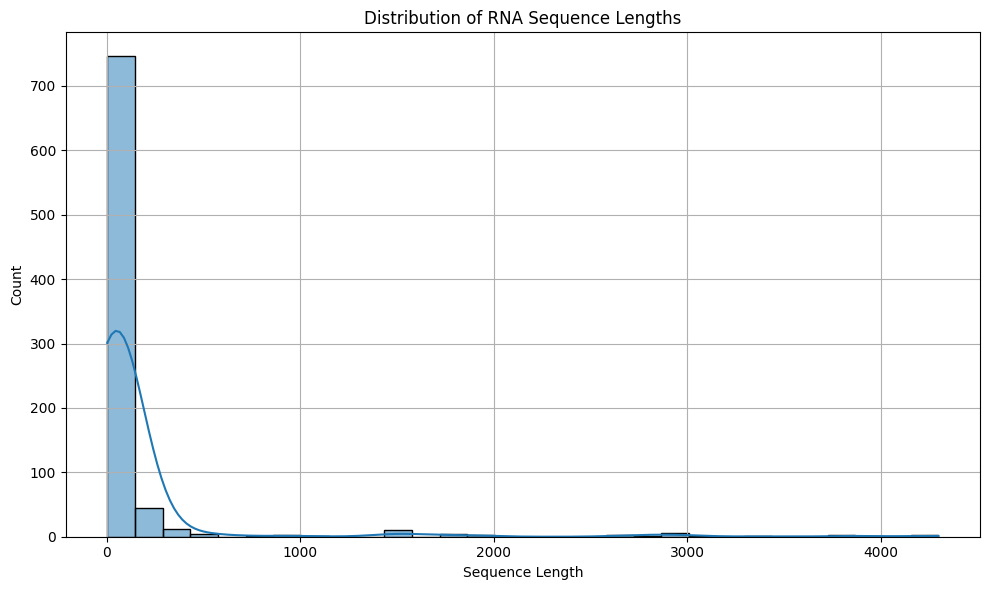

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sequence_lengths = train_sequences['sequence'].str.len()

# Basic stats
print(sequence_lengths.describe())

# Plot distribution
plt.figure(figsize=(10, 6))
sns.histplot(sequence_lengths, bins=30, kde=True)
plt.title('Distribution of RNA Sequence Lengths')
plt.xlabel('Sequence Length')
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()
plt.show()

In [11]:
train_sequences['length'] = train_sequences['sequence'].apply(lambda x: len(x))


,length
0,29
1,34
2,24
3,20
4,34


In [14]:
train_sequences.sort_values(by='length', ascending=False)['length'].head(30)

,length
437,4298
775,4269
678,4217
645,3920
646,3825
455,3806
451,3391
450,3049
454,2969
619,2903


# **📌 Step 1: Improving the GNN Model**
### **1.1 Use a Graph Transformer Instead of GCN**
Instead of a basic **Graph Convolutional Network (GCN)**, we can use a **Graph Transformer**, which is better at capturing **long-range interactions** in RNA.

### **🔹 Code: Graph Transformer Model**


In [4]:
!pip install torch_geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.9 MB/s eta 0:00:00


In [5]:
!pip install rna-fm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 63.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 37.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 65.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch_geometric.nn import GATConv, global_mean_pool
from torch_geometric.data import Data, DataLoader
import fm  # Assuming RNA-FM embedding library is installed

In [7]:
# Step 1: Load RNA-FM Model
# Load RNA-FM model
model, alphabet = fm.pretrained.rna_fm_t12()
batch_converter = alphabet.get_batch_converter()
model.eval()  # disables dropout for deterministic results

# Prepare data
data = [
    ("RNA1", "GGGUGCGAUCAUACCAGCACUAAUGCCCUCCUGGGAAGUCCUCGUGUUGCACCCCU"),
    ("RNA2", "GGGUGUCGCUCAGUUGGUAGAGUGCUUGCCUGGCAUGCAAGAAACCUUGGUUCAAUCCCCAGCACUGCA"),
    ("RNA3", "CGAUUCNCGUUCCC--CCGCCUCCA"),
]
batch_labels, batch_strs, batch_tokens = batch_converter(data)

# Extract embeddings (on CPU)
with torch.no_grad():
    results = model(batch_tokens, repr_layers=[12])
token_embeddings = results["representations"][12]
# # Function to get RNA-FM embeddings
# def get_rnafm_embedding(sequence):
#     with torch.no_grad():
#         return rnafm_model.encode(sequence).squeeze(0)  # [L, D] where L = seq length, D = embedding dim

Downloading: "https://proj.cse.cuhk.edu.hk/rnafm/api/download?filename=RNA-FM_pretrained.pth" to /root/.cache/torch/hub/checkpoints/RNA-FM_pretrained.pth
100%|██████████| 1.11G/1.11G [11:29<00:00, 1.73MB/s]


In [8]:
# Step 2: Define GNN with Attention
class RNA3DGNN(nn.Module):
    def __init__(self, in_channels, hidden_dim, out_dim):
        super(RNA3DGNN, self).__init__()
        self.conv1 = GATConv(in_channels, hidden_dim, heads=4, concat=True)
        self.conv2 = GATConv(hidden_dim * 4, hidden_dim, heads=4, concat=True)
        self.fc = nn.Linear(hidden_dim * 4, out_dim)  # Output XYZ coordinates

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        x = global_mean_pool(x, data.batch)  # Aggregate over nodes
        return self.fc(x)  # Predict 3D coordinates

# Step 3: Physics-Informed Loss Function
class EnergyLoss(nn.Module):
    def __init__(self, lambda_energy=0.1):
        super(EnergyLoss, self).__init__()
        self.lambda_energy = lambda_energy

    def forward(self, pred_coords, true_coords, energy_fn):
        mse_loss = F.mse_loss(pred_coords, true_coords)
        energy_loss = torch.mean(energy_fn(pred_coords))
        return mse_loss + self.lambda_energy * energy_loss

# Example energy function (harmonic potential)
def energy_function(coords):
    return torch.sum(torch.norm(coords[:-1] - coords[1:], dim=-1))  # Distance constraints

In [9]:
# Step 5: Load Data
def load_data():
    data_list = []
    for idx, row in train_sequences.iterrows():
        sequence = row['sequence']
        embedding = get_rnafm_embedding(sequence)
        coords = torch.tensor(train_labels.iloc[idx, 1:].values.reshape(-1, 3), dtype=torch.float)
        edge_index = torch.randint(0, len(sequence), (2, len(sequence) * 2))  # Placeholder edge index
        data_list.append(Data(x=embedding, edge_index=edge_index, y=coords))
    return DataLoader(data_list, batch_size=16, shuffle=True)


data_loader = load_data()


NameError: name 'get_rnafm_embedding' is not defined

In [ ]:
# Step 6: Train the Model
model = RNA3DGNN(in_channels=256, hidden_dim=128, out_dim=3)
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_fn = EnergyLoss(lambda_energy=0.1)

for epoch in range(50):
    for batch in data_loader:
        optimizer.zero_grad()
        pred_coords = model(batch)
        loss = loss_fn(pred_coords, batch.y, energy_function)
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1}, Loss: {loss.item()}")

In [ ]:
# Step 7: Ensemble with RibozoaNet
class RNAEnsemble(nn.Module):
    def __init__(self, model1, model2):
        super(RNAEnsemble, self).__init__()
        self.model1 = model1
        self.model2 = model2

    def forward(self, data):
        pred1 = self.model1(data)
        pred2 = self.model2(data)  # Assuming RibozoaNet follows same input format
        return (pred1 + pred2) / 2  # Simple averaging ensemble

In [ ]:
ribozoanet = RNA3DGNN(in_channels=256, hidden_dim=128, out_dim=3)  # Placeholder
ensemble_model = RNAEnsemble(model, ribozoanet)

In [ ]:
# Run inference
for batch in data_loader:
    pred_coords = ensemble_model(batch)
    print("Predicted Coordinates:", pred_coords)